## Anggota Kelompok

Amelia Marshanda S. (2041720041)

Annisa Fitri Yuliandra (2041720123)

Inda Khoirun Nisak (2041720020)

Jasmin Salsabila Arifah	(2041720097)

Rofika Nur ‘Aini (2041720099)


Kelas : TI 3B

## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

In [1]:
import numpy as np
import pandas as pd

In [2]:
# load data
df = pd.read_csv('data/tweet_emotions.csv')

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [3]:
# mengecek data null dangan info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [4]:
# mengecek jumlah data null dengan isnull()
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [5]:
# slice tweet_id
df = df.iloc[:,1:3]
df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [6]:
# cek duplikasi
df[df.duplicated(subset=["content"])]

,sentiment,content
366,worry,I feel so deflated. No more doggy.
521,worry,Somebody please save the polar bears!
1026,neutral,I'm at work
3684,sadness,@dublins98dave me too! I am down 400 euro
4363,worry,"is upset, I left my phone at home again"
...,...,...
39859,love,Happy Mothers Day
39898,love,happy mothers day!
39913,happiness,happy mother's day!
39915,love,happy mother's day everyone


In [7]:
# drop duplicate
df.drop_duplicates(subset=['content'], inplace=True)
df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [8]:
import re
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.strip(' ') # remove characters space from both left and right text
    return text

df['content'] = df['content'].apply(cleaningText)
df

,sentiment,content
0,empty,i know i was listenin to bad habit earlier an...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,We want to trade with someone who has Houston ...
...,...,...
39995,neutral,
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY N...


In [9]:
# bersih-bersih data
# menghapus karakter khusus
df = df.copy()
df['content_clean'] = df['content']
df['content_clean'] = df['content_clean'].replace(regex='(@\w+)|#|&|!',value='')
rm_rt_url = lambda x: re.sub('(@[A-Za-z0-9\w|+]) | (@\w+:) | (\w+:\/\/\S+) | (www.\S+)',' ',x)
rm_punct = lambda x: re.sub('\W', ' ', x)
df['content_clean'] = df.content_clean.map(rm_rt_url).map(rm_punct)

In [10]:
df.head(100)

,sentiment,content,content_clean
0,empty,i know i was listenin to bad habit earlier an...,i know i was listenin to bad habit earlier an...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh waitin o...
2,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony gloomy friday
3,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends SOON
4,neutral,We want to trade with someone who has Houston ...,We want to trade with someone who has Houston ...
...,...,...,...
95,sadness,hiii im on my ipod...i cant fall asleep,hiii im on my ipod i cant fall asleep
96,sadness,dont wanna work - tomorrow but i get paid,dont wanna work tomorrow but i get paid
97,sadness,feels sad coz i wasnt able to play with the gu...,feels sad coz i wasnt able to play with the guys
98,neutral,PrinceCharming,PrinceCharming


In [11]:
# lowercase
df['content_clean'] = df.content_clean.str.lower()
df.head(100)

,sentiment,content,content_clean
0,empty,i know i was listenin to bad habit earlier an...,i know i was listenin to bad habit earlier an...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhh waitin o...
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends soon
4,neutral,We want to trade with someone who has Houston ...,we want to trade with someone who has houston ...
...,...,...,...
95,sadness,hiii im on my ipod...i cant fall asleep,hiii im on my ipod i cant fall asleep
96,sadness,dont wanna work - tomorrow but i get paid,dont wanna work tomorrow but i get paid
97,sadness,feels sad coz i wasnt able to play with the gu...,feels sad coz i wasnt able to play with the guys
98,neutral,PrinceCharming,princecharming


c:\Users\Layla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


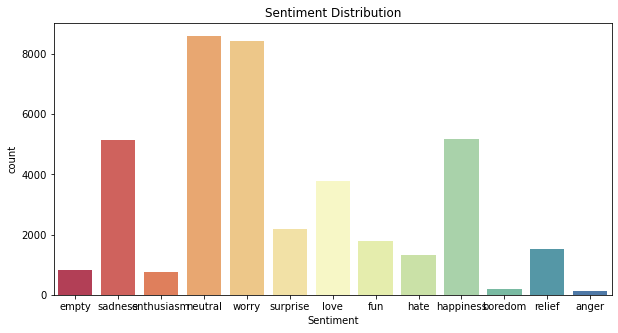

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(df.sentiment, palette='Spectral')
plt.xlabel('Sentiment')
plt.title('Sentiment Distribution');

In [13]:
df.sentiment.value_counts()

neutral       8598
worry         8437
happiness     5184
sadness       5154
love          3785
surprise      2181
fun           1775
relief        1522
hate          1322
empty          822
enthusiasm     758
boredom        179
anger          110
Name: sentiment, dtype: int64

In [14]:
df.content_clean

0        i know  i was listenin to bad habit earlier an...
1        layin n bed with a headache  ughhhh   waitin o...
2                      funeral ceremony   gloomy friday   
3                      wants to hang out with friends soon
4        we want to trade with someone who has houston ...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mother s day to all the mommies out ther...
39998    wassup beautiful follow me  peep out my new hi...
39999    bullet train from tokyo    the gf and i have b...
Name: content_clean, Length: 39827, dtype: object

In [15]:
# label encoder
from sklearn.preprocessing import LabelEncoder

labelEncod = LabelEncoder()
df['sentiment'] = labelEncod.fit_transform(df['sentiment'])

In [16]:
# TF/IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
x = vectorizer.fit_transform(df['content_clean'])

In [17]:
y = df['sentiment']

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# SVM

In [19]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print(score)

0.3365135157753787


# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Initiate Model
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_gini = DecisionTreeClassifier(criterion='gini')

# Fit model
# Entropy
dt_entropy.fit(x_train, y_train)
y_pred_entropy_train = dt_entropy.predict(x_train)
y_pred_entropy = dt_entropy.predict(x_test)

# Gini
dt_gini.fit(x_train, y_train)
y_pred_gini_train = dt_gini.predict(x_train)
y_pred_gini = dt_gini.predict(x_test)

# Evaluasi
# Entropy
acc_entropy_train = accuracy_score(y_train, y_pred_entropy_train)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

# Gini
acc_gini_train = accuracy_score(y_train, y_pred_gini_train)
acc_gini = accuracy_score(y_test, y_pred_gini)

print(f'Akurasi Entropy Train: {acc_entropy_train}')
print(f'Akurasi Entropy: {acc_entropy}')
print('\n')
print(f'Akurasi Gini Train: {acc_gini_train}')
print(f'Akurasi Gini: {acc_gini}')

Akurasi Entropy Train: 0.9774015352607791
Akurasi Entropy: 0.2527408151309733


Akurasi Gini Train: 0.9774015352607791
Akurasi Gini: 0.26395514268976483


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier 'dt' dengan kedalaman maksimum 6
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# max_depth = batas atas berapa kali, datanya baru boleh di split
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(x_train, y_train)
from sklearn.metrics import accuracy_score

# Memprediksi test set labels
y_pred = dt.predict(x_test)

#  menghitung set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.26
